# WorldCup historical 경기결과를 통해 예측해보는 2018 WorldCup 우승팀

In [1]:
# 필요한 패키지 임포트  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\joyh1\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 데이터 읽어오기
results = pd.read_csv("C:/Users/joyh1/worldcup_predict_younghun/WorldCupMatches.csv")

In [3]:
# 데이터 구성 살펴보기
results.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [22]:
results = results.rename(columns = {'Home Team Name':'home_team','Away Team Name':'away_team'})
# 나중에 feature로 쓸 칼럼명의 공백을 미리 없애기 위해 칼럼명 다시 설정 (데이터구조 처리한 후 rename하면 에러뜸..)

In [23]:
# 나중에 결측치를 dropna.() 로 제거해주자!!
results.tail()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
847,2014,Quarter-finals,Netherlands,0,0,Costa Rica,0.0,0.0,Tie,0
848,2014,Semi-finals,Brazil,1,7,Germany,0.0,5.0,Germany,6
849,2014,Semi-finals,Netherlands,0,0,Argentina,0.0,0.0,Tie,0
850,2014,Play-off for third place,Brazil,0,3,Netherlands,0.0,2.0,Netherlands,3
851,2014,Final,Germany,1,0,Argentina,0.0,0.0,Germany,1


In [24]:
results.shape

(850, 10)

## 1) Exploring the Data

불러온 results 데이터 구성을 보면 20개의 칼럼으로 이루어져 있다. 
하지만 이런 데이터를 통해서 승패를 예측하는데 기여하는 Feature들을 필터링 해본다면 'Year', 'Stage', Home team name', 'Away team name', 'Home team score', 'Away team score' 정도로 총 6개의 정도를 꼽아볼 수 있겠다. 

나머지 feature들은 부수적인 feature들로 월드컵 승자를 예측하는데 영향을 거의 주지 않은 feature들이므로 삭제를 해야 할 거 같다.

가장 먼저 할 작업은 'winner' 라는 새로운 칼럼(열=속성=Feature)을 만들어서 각 경기의 승리팀을 뽑아내야 한다.

In [25]:
winner = []
for i in range(len(results['Home Team Name'])):
    if results['Home Team Goals'][i] > results['Away Team Goals'][i]:
        winner.append(results['Home Team Name'][i])
    elif results['Home Team Goals'][i] < results['Away Team Goals'][i]:
        winner.append(results['Away Team Name'][i])
    else:
        winner.append('Tie')
        
results['winning_team'] = winner

# 경기 당 '골득실 차이'를 나타내는 새로운 칼럼 추가
results['goal_difference'] = np.absolute(results['Home Team Goals'] - results['Away Team Goals'])
results.head()

KeyError: 'Home Team Name'

In [26]:
results.tail()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
847,2014,Quarter-finals,Netherlands,0,0,Costa Rica,0.0,0.0,Tie,0
848,2014,Semi-finals,Brazil,1,7,Germany,0.0,5.0,Germany,6
849,2014,Semi-finals,Netherlands,0,0,Argentina,0.0,0.0,Tie,0
850,2014,Play-off for third place,Brazil,0,3,Netherlands,0.0,2.0,Netherlands,3
851,2014,Final,Germany,1,0,Argentina,0.0,0.0,Germany,1


In [27]:
# 결측치 삭제 후 데이터 끝 다시 살펴보기
results = results.dropna()
results.tail()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
847,2014,Quarter-finals,Netherlands,0,0,Costa Rica,0.0,0.0,Tie,0
848,2014,Semi-finals,Brazil,1,7,Germany,0.0,5.0,Germany,6
849,2014,Semi-finals,Netherlands,0,0,Argentina,0.0,0.0,Tie,0
850,2014,Play-off for third place,Brazil,0,3,Netherlands,0.0,2.0,Netherlands,3
851,2014,Final,Germany,1,0,Argentina,0.0,0.0,Germany,1


In [28]:
# 'Home Team Goals', 'Away Team Goals', 'goal_difference' 칼럼의 value들을 정수형으로 바꾸기
results = results.astype({'Year':int, 'Home Team Goals' : int, 'Away Team Goals' : int, 'goal_difference' : int})
results.head()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
1,1930,Group 4,USA,3,0,Belgium,2.0,0.0,USA,3
2,1930,Group 2,Yugoslavia,2,1,Brazil,2.0,0.0,Yugoslavia,1
3,1930,Group 3,Romania,3,1,Peru,1.0,0.0,Romania,2
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1


In [29]:
# 우리가 원하는 결과를 예측하는데 필요없는 Feature들을 삭제하자

results = results.drop(['Datetime','Stadium','City','Win conditions','Attendance','Assistant 1','Assistant 2','Referee',
                      'RoundID','MatchID','Home Team Initials','Away Team Initials'], axis=1)

KeyError: "['Datetime' 'Stadium' 'City' 'Win conditions' 'Attendance' 'Assistant 1'\n 'Assistant 2' 'Referee' 'RoundID' 'MatchID' 'Home Team Initials'\n 'Away Team Initials'] not found in axis"

In [30]:
results.head()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
1,1930,Group 4,USA,3,0,Belgium,2.0,0.0,USA,3
2,1930,Group 2,Yugoslavia,2,1,Brazil,2.0,0.0,Yugoslavia,1
3,1930,Group 3,Romania,3,1,Peru,1.0,0.0,Romania,2
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1


### 임의로 하나의 국가 'France' 로 정하고 subset of data로 우선 샘플 작업을 해보자

In [31]:
# France가 치뤘던 경기만 담은 dataframe 출력
df = results[(results['Home Team Name'] == 'France') | (results['Away Team Name'] == 'France')]
france = df.iloc[:]
france.head()

KeyError: 'Home Team Name'

([<matplotlib.axis.XTick at 0x17e9f08df60>],
 <a list of 1 Text xticklabel objects>)

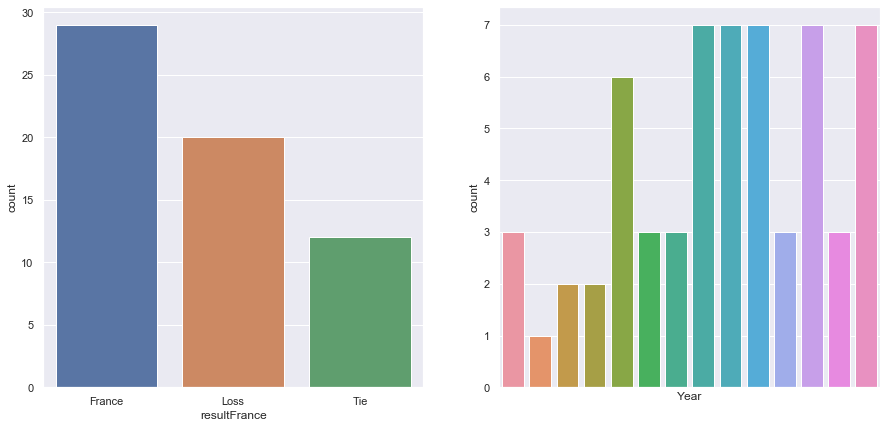

In [32]:
# France를 이긴 팀들을 모두 Loss 값으로 돌려서 시각화 하기

winrate = []
for row in france['winning_team']:
    if row != 'France' and row != 'Tie':
        winrate.append('Loss')
    else:
        winrate.append(row)
dfwinrate = pd.DataFrame(winrate, columns=['resultFrance'])

# Seaborn으로 시각화 그래프 그리기
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultFrance', data=dfwinrate, ax = ax[0])
sns.countplot(x='Year', data=france, ax = ax[1])
plt.xticks(np.arange(min(france.Year), max(france.Year), 100))

## - 그래프 시각화 결과 분석

#### 첫번째 그래프를 보면 France의 역대 월드컵 전적을 살펴볼 수가 있다. 
#### 두번째 그래프는 연도별 France의 월드컵 경기수를 나타내는 그래프 입니다.

# ---------------------------------------------------------

## 2018년 월드컵 참가자 국가들로 범위 제한

In [34]:
# 2018년 월드컵 참가자 팀 리스트
wc_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic',
           'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria',
           'Senegal', 'Tunisia', 'Costa Rica', 'Mexico',
           'Panama', 'Argentina', 'Brazil', 'Colombia',
           'Peru', 'Uruguay', 'Belgium', 'Croatia',
           'Denmakr', 'England', 'France', 'Germany',
           'Iceland', 'Poland', 'Portgual', 'Russia',
           'Serbia', 'Spain', 'Sweden', 'Switzerland']

# 전체 원시 데이터에서 2018년 월드컵 참가국으로만 이루어진 데이터 프레임으로 축소
df_teams_home = results[results['home_team'].isin(wc_teams)]
df_teams_away = results[results['away_team'].isin(wc_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

Year                    890
Stage                   890
home_team               890
Home Team Goals         890
Away Team Goals         890
away_team               890
Half-time Home Goals    890
Half-time Away Goals    890
winning_team            890
goal_difference         890
dtype: int64

In [35]:
df_teams.head()

,Year,Stage,home_team,Home Team Goals,Away Team Goals,away_team,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1
8,1930,Group 3,Uruguay,1,0,Peru,0.0,0.0,Uruguay,1
10,1930,Group 1,Argentina,6,3,Mexico,3.0,1.0,Argentina,3
11,1930,Group 2,Brazil,4,0,Bolivia,1.0,0.0,Brazil,4


In [36]:
# 우승팀 예측에 필요하지 않은 속성값들 제거
df_teams = df_teams.drop(['Year','Stage','Home Team Goals',
                         'Away Team Goals', 'Half-time Home Goals',
                         'Half-time Away Goals','goal_difference'], axis=1)
df_teams.head()

,home_team,away_team,winning_team
0,France,Mexico,France
4,Argentina,France,Argentina
8,Uruguay,Peru,Uruguay
10,Argentina,Mexico,Argentina
11,Brazil,Bolivia,Brazil


## ML 모델 빌딩

##### 모델 처리를 쉽게 하도록 하기 위해 Y(예측값)을 수정
##### 홈 팀이 이겼으면 2, 비겼으면 1, 어웨이 팀이 이겼으면 0으로 수정


In [37]:
# 인덱싱 번호를 다시 리셋팅
df_teams = df_teams.reset_index(drop=True)
df_teams.head()

,home_team,away_team,winning_team
0,France,Mexico,France
1,Argentina,France,Argentina
2,Uruguay,Peru,Uruguay
3,Argentina,Mexico,Argentina
4,Brazil,Bolivia,Brazil


In [38]:
df_teams.loc[df_teams.winning_team == df_teams.home_team, 'winning_team'] = 2
df_teams.loc[df_teams.winning_team == 'Tie', 'winning_team'] = 1
df_teams.loc[df_teams.winning_team == df_teams.away_team, 'winning_team'] = 0

df_teams.head()


,home_team,away_team,winning_team
0,France,Mexico,2
1,Argentina,France,2
2,Uruguay,Peru,2
3,Argentina,Mexico,2
4,Brazil,Bolivia,2


##### scikit-learn 모델을 실행시키기 위해 홈팀과 어웨이팀의 값들을 가변수로 변형시킴. 이 때 get_dummies를 쓰는 이유는 데이터가 범주형 데이터이기 때문이다.

In [41]:
from sklearn.model_selection import train_test_split

# 가변수 얻기
final = pd.get_dummies(df_teams, prefix=['home_team', 'away_team'],
                      columns=['home_team','away_team'])

# X , y 구분
X = final.drop(['winning_team'], axis=1) # 예측데이터인 winning_team 제외
y = final['winning_team'] # 예측데이터
y = y.astype('int') # 데이터형태를 정수형으로 다 바꾸기

# train 데이터와 test 데이터 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print('Training set accuracy: ', '%.3f'%(score))
print('Test set accuracy: ', '%.3f'%(score2))

Training set accuracy:  0.674
Test set accuracy:  0.582


C:\Users\joyh1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joyh1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


##### 간과한 점이 월드컵 경기에는 홈/어웨이 가 따로 존재하지 않는다(물론 개최국 제외하면..) 
##### 그렇다면 홈팀일 때 얼마나 이기는지 그래프로 분석해보자

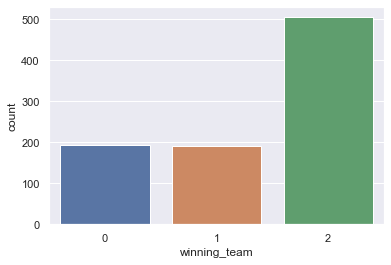

In [44]:
sns.countplot(x='winning_team', data=df_teams)

##### 망했다... 홈 팀일 경우 웬만하면 승리하는 것으로 나타났다...